## Meta Analysis examples

In this notebook we consider two recently published meta-analyses of the psychological correlates of cannabis use:

__Hindley et al.:__ [Psychiatric symptoms caused by cannabis constituents: a systematic review and meta-analysis](https://www.thelancet.com/journals/lanpsy/article/PIIS2215-0366(20)30074-2/fulltext#seccestitle10)

__Schoeler et al.:__ [Assessing rates and predictors of cannabis-associated psychotic symptoms across observational, experimental and medical research](https://www.nature.com/articles/s44220-024-00261-x#code-availability)

__Overview of Hindley et al.__

This is a focused meta-analysis of experiments that employ a [crossover design](https://en.wikipedia.org/wiki/Crossover_study) to assess the psychological effect of [tetrahydrocannabinol (THC)](https://en.wikipedia.org/wiki/Tetrahydrocannabinol), which is the primary psychoactive constituent of cannabis. In each study, healthy subjects were recruited according to eligibility criteria.  Then, in consecutive sessions subjects were administered controlled doses of THC or a placebo in a blinded fashion.  All subjects received both treatments (THC and placebo), and in some (but not all) studies the order of treatment administration was randomized.  Established symptom scales were used to quantify each subject's psychological state following each treatment.  

All analysis is _within subjects_, meaning that we focus on the difference in a symptom scale between the THC and placebo treatments within each subject.

The symptom scales in this work are referred to as _positive_ and _negative_.  These terms have technical meanings in psychiatry, with _positive_ here referring to delusions and hallucinations while _negative_ refers to amotivation and blunted affect.  We will focus on the positive symptom scales here.

This meta-analysis imposed strict criteria for a study to be included.  Out of 517 studies that were initially considered, only 15 met the meta-analysis inclusion criterion.

__Overview of Schoeler et al.__

This is a synthesis of findings from experimental and observational studies of mental health sequelae of cannabis use, or of THC administration in experimental and/or medical settings.  All studies focus on psychological symptoms and associated outcomes relating to psychosis that may be caused by cannabis.  This scope includes individual symptoms as well as the outcome of seeking emergency care due to psychosis symptoms.

There are essentially three distinct analyses:

* The cannabis use findings aim to capture psychological symptoms in cannabis users based on observational data.  The underlying studies mainly rely on self-reported assessments of self-identified cannabis users among people who are enrolled into observational studies or who participate in web-surveys.  

* The studies conducted in medical settings assess psychosis-related side effects of THC treatment for medical conditions such as pain.

* The studies of THC administration in healthy subjects mostly echo the findings of the Hindley et al. study.


In [2]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.distributions import t, chi2
import statsmodels.api as sm

## Meta-analysis of Hindley et al.

We can extract the data for the positive symptom scale from [supplementary table 2](
https://www.thelancet.com/cms/10.1016/S2215-0366(20)30074-2/attachment/acd95ee4-1612-449d-adec-45fede8a9b51/mmc1.pdf).  Some of the key variables in the dataset are:

* _n1i_, _n2i_ the treatment and placebo sample sizes, which are always equal since this is a within-subjects design

* _m1i_, _m2i_ the sample means of the symptom scales for the treatment and control responses, respectively

* _sd1i_, _sd2i_ the sample [standard deviations](https://en.wikipedia.org/wiki/Standard_deviation) of the symptom scales for the treatment and control conditions, respectively


In [3]:
dt = """author,year,time,n1i,m1i,sd1i,n2i,m2i,sd2i,route,thc_drob,dose,prev_cannabis_mean,frequent_use,current_use,tobacco_current,age_m,Male,panss_bprs
Barkus,2011,30,9,13.37,2.4,9,7.12,0.0,1,0,2.5,153.0,1.0,0.0,,26.3,100,1
Bhattacharyya,2015,120,36,9.6,3.62367,36,7.26,0.582702,0,1,10.0,10.8333,0.0,0.0,25,25.97,100,1
Bhattacharyya,2009,120,15,9.58847489,8.27122099,15,7.05801,0.24986901,0,1,10.0,8.0,0.0,0.0,46.66666667,26.7,100,1
D'Souza,2012,10,26,12.65,3.19,26,7.96,2.18,1,1,2.133,318.0,1.0,,15.79,25.92,65.3846154,1
D'Souza,2004,10,18,9.966837,2.71207595,18,6.813776,0.82992611,1,1,5.0,60.77,0.0,0.0,23.81,29.0,63.6363636,1
D'Souza,2008,10,20,10.52,2.61,20,8.05,1.5,1,1,5.0,147.51,1.0,1.0,,24.8,70,1
D'Souza,2009a,15,14,9.48755251,1.51,14,7.6335764,0.73450605,1,1,2.0774,48.86,0.0,0.0,0,25.85,78.5714286,1
D'Souza,2009b,15,9,8.54065211,1.27455069,9,7.991526,0.866052,1,1,2.1125,141.72,1.0,1.0,11.11111111,22.66,100,1
Kleinloog,2012,36,32,9.07,2.29,32,7.47,0.9,2,1,,292.2,1.0,0.0,0,22.3,100,1
Liem-Moolenaar,2010,40,11,10.63,3.96,11,7.72,1.27,2,1,,,,0.0,,24.1,100,1
Morgan,2018,NR,48,6.6870748,1.03687393,48,6.42857,1.0,2,1,8.0,,,1.0,70.83333333,21.705,70.83,0
Morrison,2009,30,21,10.41396,5.28399034,21,7.0005403,0.0,1,0,2.5,,,0.0,,28.0,100,1
Morrison,2011,30,16,11.3133161,3.5703548,16,7.036427,0.0,1,0,1.25,40.0,0.0,0.0,,26.0,43.75,1
Radhakrishnan,2015,70,23,10.87,2.44,23,8.04,1.46,1,1,1.2147,296.75,1.0,,14.8148148,26.26,100,1
Ranganathan,2012,120,26,9.68,1.93,26,7.726444,1.03775281,1,1,1.89,,,,26.66666667,27.14,86.6666667,1"""

da = pd.read_csv(io.StringIO(dt))

da["route"] = da["route"].replace({0: "oral", 1: "IV", 2: "inhaled"})
da

,author,year,time,n1i,m1i,sd1i,n2i,m2i,sd2i,route,thc_drob,dose,prev_cannabis_mean,frequent_use,current_use,tobacco_current,age_m,Male,panss_bprs
0,Barkus,2011,30,9,13.370000,2.400000,9,7.120000,0.000000,IV,0,2.5000,153.0000,1.0,0.0,NaN,26.300,100.000000,1
1,Bhattacharyya,2015,120,36,9.600000,3.623670,36,7.260000,0.582702,oral,1,10.0000,10.8333,0.0,0.0,25.000000,25.970,100.000000,1
2,Bhattacharyya,2009,120,15,9.588475,8.271221,15,7.058010,0.249869,oral,1,10.0000,8.0000,0.0,0.0,46.666667,26.700,100.000000,1
3,D'Souza,2012,10,26,12.650000,3.190000,26,7.960000,2.180000,IV,1,2.1330,318.0000,1.0,NaN,15.790000,25.920,65.384615,1
4,D'Souza,2004,10,18,9.966837,2.712076,18,6.813776,0.829926,IV,1,5.0000,60.7700,0.0,0.0,23.810000,29.000,63.636364,1
5,D'Souza,2008,10,20,10.520000,2.610000,20,8.050000,1.500000,IV,1,5.0000,147.5100,1.0,1.0,NaN,24.800,70.000000,1
6,D'Souza,2009a,15,14,9.487553,1.510000,14,7.633576,0.734506,IV,1,2.0774,48.8600,0.0,0.0,0.000000,25.850,78.571429,1
7,D'Souza,2009b,15,9,8.540652,1.274551,9,7.991526,0.866052,IV,1,2.1125,141.7200,1.0,1.0,11.111111,22.660,100.000000,1
8,Kleinloog,2012,36,32,9.070000,2.290000,32,7.470000,0.900000,inhaled,1,NaN,292.2000,1.0,0.0,0.000000,22.300,100.000000,1
9,Liem-Moolenaar,2010,40,11,10.630000,3.960000,11,7.720000,1.270000,inhaled,1,NaN,NaN,NaN,0.0,NaN,24.100,100.000000,1


## Informal analyses

Before proceeding to a more formal meta-analysis, we first use visualization to explore the data.

The first two plots below show the relationship between the standard deviation and mean, first in the treatment condition and then in the placebo condition. A few immediate insights are:

* There is a weak but evident mean/variance relationship, in which the studies with greater means tend to have greater standard deviation.

* Three of the studies report zero standard deviation in the placebo condition.

Text(0, 0.5, 'Treatment standard deviation')

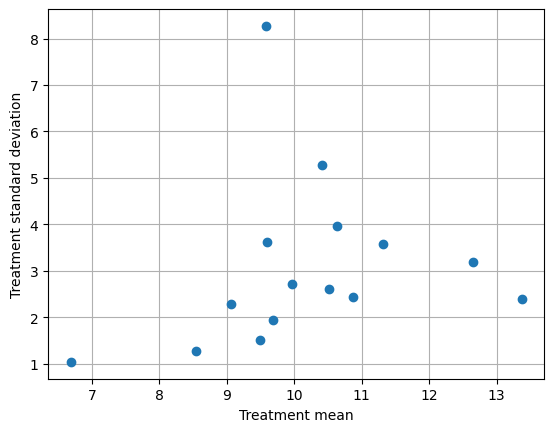

In [4]:
plt.grid(True)
plt.plot(da["m1i"], da["sd1i"], "o")
plt.xlabel("Treatment mean")
plt.ylabel("Treatment standard deviation")

Text(0, 0.5, 'Placebo standard deviation')

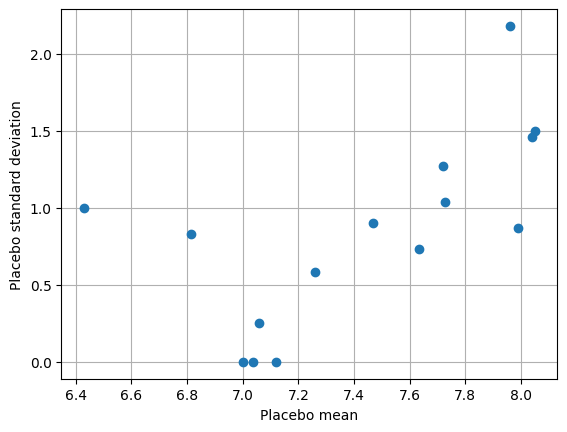

In [5]:
plt.grid(True)
plt.plot(da["m2i"], da["sd2i"], "o")
plt.xlabel("Placebo mean")
plt.ylabel("Placebo standard deviation")

The scatterplot below examines the relationship between the treatment and placebo mean responses.  If there is a lot of heterogeneity in baseline risk, this plot will show a positive trend.  Although no such trend is evident here, it is notable that the same study has the lowest mean for both the placebo and treatment conditions.

Text(0, 0.5, 'Placebo mean')

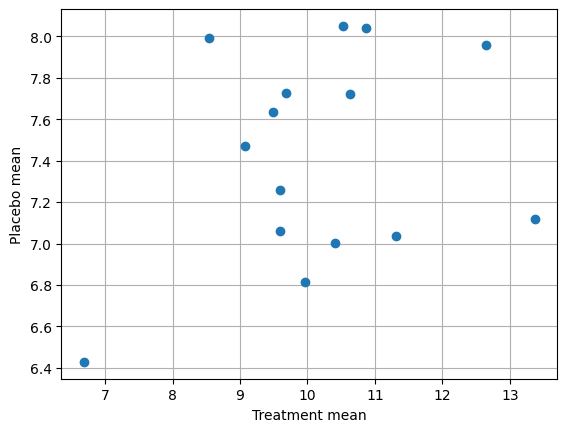

In [6]:
plt.grid(True)
plt.plot(da["m1i"], da["m2i"], "o")
plt.xlabel("Treatment mean")
plt.ylabel("Placebo mean")

The scatterplot below examines the standard deviations in the placebo and active conditions.  There is no evident relationship between the two standard deviations.

Text(0, 0.5, 'Placebo standard deviation')

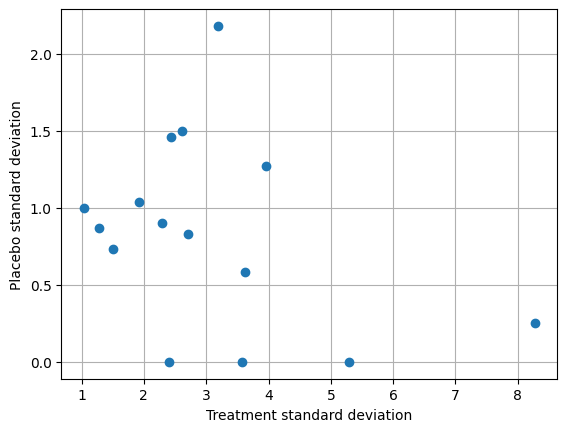

In [7]:
plt.grid(True)
plt.plot(da["sd1i"], da["sd2i"], "o")
plt.xlabel("Treatment standard deviation")
plt.ylabel("Placebo standard deviation")

The next two scatterplots show the treamtent and placebo sample sizes against their respective means.

There is little evidence of a systematic difference in the estimated treatment arm responses between smaller and larger studies, and this is also true for the placebo arm responses.

Text(0, 0.5, 'Treatment mean')

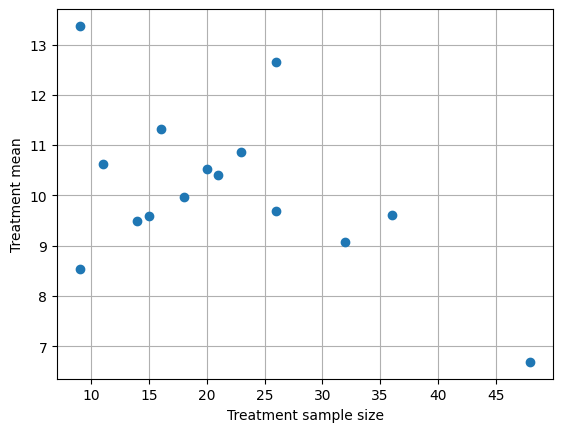

In [8]:
plt.grid(True)
plt.plot(da["n1i"], da["m1i"], "o")
plt.xlabel("Treatment sample size")
plt.ylabel("Treatment mean")

Text(0, 0.5, 'Placebo mean')

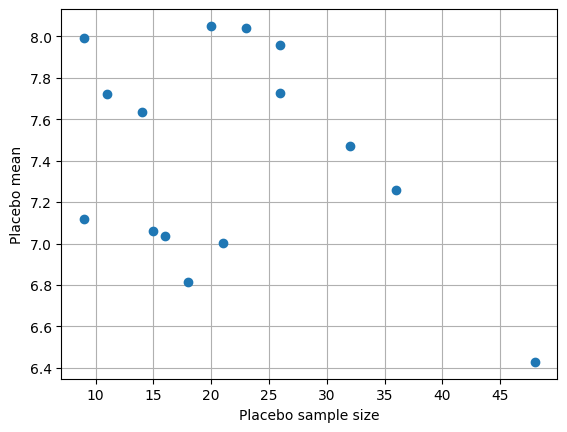

In [9]:
plt.grid(True)
plt.plot(da["n2i"], da["m2i"], "o")
plt.xlabel("Placebo sample size")
plt.ylabel("Placebo mean")

The scatterplot below shows the placebo mean plotted against the treatment mean.  The grey line is the line of equality and it is evident that in all studies, the treatment mean is greater than the placebo mean.

Text(0, 0.5, 'Placebo mean')

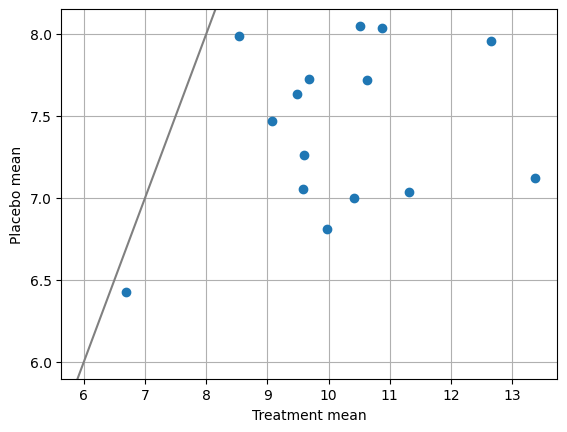

In [10]:
plt.grid(True)
plt.plot(da["m1i"], da["m2i"], "o")
plt.axline([6, 6], [8, 8], color="grey")
plt.xlabel("Treatment mean")
plt.ylabel("Placebo mean")

# Standardized mean changes

The function below calculates the average within-subject "standardized mean change" (SMC) between the treatment and control conditions and its standard error, for each study in the meta-analysis.  The SMC is a dimension-free measure of effect size that can b e compared more directly between studies.  It is closely related to the widely-reported "Cohen's-D" effect size.

A key challenge here is that in any within-subjects design, the two measurements for a subject are correlated, but researchers rarely report this correlation in their manuscripts.  The standardized mean change cannot be calculated without knowing this correlation.  It is therefore common in meta-analyses to assume a value for this parameter such as r=0.5.

In [11]:
def gen_se(da, r):
  """
  Append the standardized mean change (SMC) for each study to the dataframe 'da',
  assuming that the within-subject correlation is 'r'.

  The standard error for the SMC is also calculated, along with the upper and lower 95% confidence bounds.
  """
  # Standard deviation of the within-subject difference for one subject.
  sdd = np.sqrt(da["sd1i"]**2 + da["sd2i"]**2 - 2*r*da["sd1i"]*da["sd2i"])
  # The standardized mean difference
  da["smc"] = (da["m1i"] - da["m2i"]) / sdd
  # The standard error of the standardized mean difference
  da["smc_se"] = 1 / np.sqrt(da["n1i"])
  # Lower and upper confidence limits for the SMC
  qq = t(da["n1i"]-2).ppf(0.975)
  da["lcb"] = da["smc"] - qq*da["smc_se"]
  da["ucb"] = da["smc"] + qq*da["smc_se"]
  return da

da = gen_se(da, 0.5)

There are some special consequences of using the SMC (standardized mean change) in a meta-analysis that utilizes within-subject commparisons.  Let $d_i = y_i - x_i$ denote the difference between subject $i$'s response for the active treatment ($y_i$) and the placebo ($x_i$).  The standard deviation of $d_i$ is $s_p = \sqrt{s_1^2 + s_2^2 - 2rs_1s_2}$.  Let $\tilde{d}_i = d_i/s_p$.  The standard deviation of $\tilde{d}_i$ is $1$.

Let $\bar{d} = (\tilde{d}_1 + \cdots + \tilde{d}_n)/m$ denote the average of the $\tilde{d}_i$ over the (independent) studies.  The standard error of $\bar{d}$ is $1/\sqrt{m}$.  The standard error of the SMC does not depend on the standard deviations or on the assumed correlation coefficient $r$.  

Each $\tilde{d}_i$ does in general depend on the standard deviations and correlation parameter.  However, something special happens when we use $r=1/2$ as done here.  In this case, the standard deviation of $d_i$ is $\sqrt{s_1^2 + s_2^2 - s_1s_2}$.  If $s_2 = 0$, the SD simplifies to $s_1$, and if we replace the value of $s_2$ with $s_1$ then we also get $s_1$.  Thus, in this special case, replacing a value $s_2=0$ with $s_2=s_1$ yields identical results.

The standard error of the SMC is a smoothly decreasing function of the sample size ($1/\sqrt{n}$).

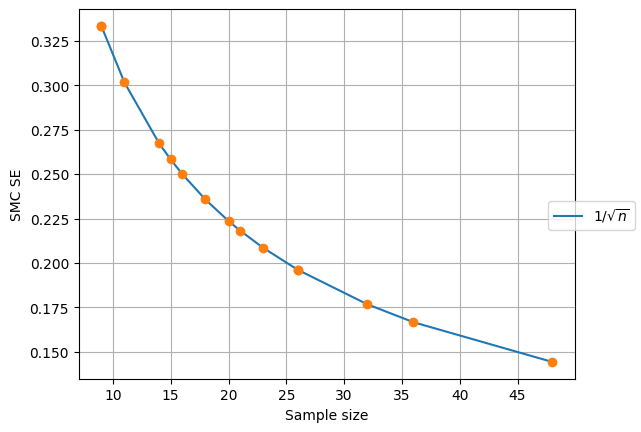

In [12]:
plt.grid(True)
n1i = np.sort(da["n1i"])
plt.plot(n1i, 1/np.sqrt(n1i), "-", label="$1/\sqrt{n}$")
plt.plot(da["n1i"], da["smc_se"], "o")
plt.xlabel("Sample size")
plt.ylabel("SMC SE")
ha, lb = plt.gca().get_legend_handles_labels()
plt.figlegend(ha, lb, loc="center right")

## Integration of p-values

We begin by calculating the study-level p-values.  We can analyze these as an esemble of evidence from different sources, and combine them into a "meta p-value".  If all studies are null (i.e. if the "global null" holds), then these p-values would be an IID sample from a uniform distribution in (0,1), but clearly that is not the case here.

In [13]:
da["pvalue"] = t(da["n1i"]-2).cdf(-np.abs(da["smc"])/da["smc_se"])

Fisher's combining rule produces a statistic that under the global null follows a chi-square distribution with $2m=30$ degrees of freedom.  The "meta p-value" based on Fisher's method is essentially zero.


In [14]:
fp = -2*np.log(da["pvalue"]).sum()
meta_p = 1 - chi2(2*da.shape[0]).cdf(fp)
[fp, meta_p]

[262.00753522900357, 0.0]

The studies under consideration include multiple studies conducted by similar author groups, and these could potentially be statistically dependent.  One way to account for such dependence is using the Bonferroni approach, under which the evidence remains strong.

In [15]:
bonf = da.shape[0] * da["pvalue"].min()
bonf

8.516266761843816e-08

Methods due to Vovk allow us to obtain p-values that are robust to dependence by rescaling the three [Pythagorean means](https://en.wikipedia.org/wiki/Pythagorean_means).

In [16]:
pval = da["pvalue"]
m = da.shape[0]
am = 2*pval.mean()
gm = np.exp(1) * np.exp(np.log(pval).mean())
hm = np.log(m) / np.mean(1 / pval)
[am, gm, hm]

[0.03697682558328242, 0.0004378717460811575, 2.2873822038144646e-07]

We proceed with a scatterplot of the SMC against the study size.  This is a simple way to assess for heterogeneity that could possibly reflect systematic methodological differences between larger and smaller studies.  There is no clear trend below, although it is notable that the largest study has the smallest SMC and one of the two smallest studies has the largest SMC.

Text(0, 0.5, 'SMC')

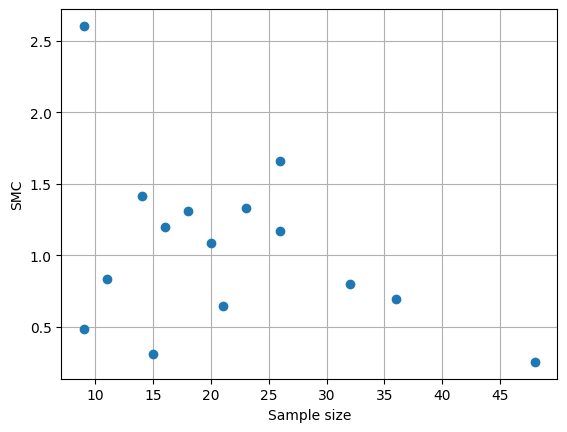

In [17]:
plt.grid(True)
plt.plot(da["n1i"], da["smc"], "o")
plt.xlabel("Sample size")
plt.ylabel("SMC")

## Assessment of heterogeneity

The following function calculates the pooled estimate of the SMC using inverse variance weighting.

In [18]:
def pooled_smc(da):
  w = 1 / da["smc_se"]**2
  w /= w.sum()
  smc0 = np.dot(w, da["smc"])
  return smc0

The following function constructs a simple [forest plot](https://en.wikipedia.org/wiki/Forest_plot) of the study-level SMC's, along with the pooled estimate of the population SMC.  This should align with figure 3 from the Hindley et al. paper.

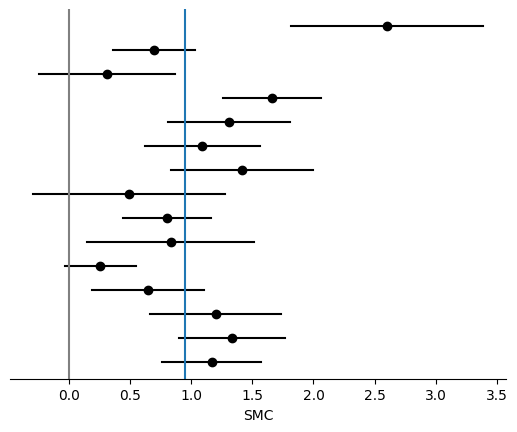

In [19]:
def forest(da):
  ii = da.shape[0] - np.arange(da.shape[0])
  plt.plot(da["smc"], ii, "o", color="black")
  for i in range(len(ii)):
    plt.plot([da["lcb"][i], da["ucb"][i]], [ii[i], ii[i]], "-", color="black")
  smc0 = pooled_smc(da)
  plt.gca().axvline(smc0)
  plt.gca().axvline(0, color="grey")
  plt.gca().spines[['right', 'left', 'top']].set_visible(False)
  plt.gca().set_yticks([])
  plt.xlabel("SMC")
  plt.show()

forest(da)

The function below calculate the pooled SMC estimate, the Cochrane's Q statistics, and the corresponding estimate of the heterogeneity statistic (I-squared).

In [20]:
def cochraneQ(da):
  smc0 = pooled_smc(da)
  cq = (da["smc"] - smc0) / da["smc_se"]
  Q = np.sum(cq**2)
  isquare = 1 - (da.shape[0]-1)/Q
  return smc0,Q,isquare

The Hindley et al. study reports a consensus treatment effect of 0.91, a Q statistic of 43.7 and an I-square of 65.7%.  Our estimates of these quantities are shown below.  We are using a slightly different method to estimate the consensus treatment effect and yet the findings for this parameter are quite similar.  Our estimates of heterogeneity are larger than reported by the authors.

In [21]:
smc0, Q, isquare = cochraneQ(da)
[smc0, Q, isquare]

[0.945969416777176, 85.58393139452481, 0.8364178909302168]

## Meta-regression analysis

Next we perform some meta-regressions to assess the extent to which specific study features are associated with greater treatment effects.  We will conduct meta-regressions using weighted least squares (WLS) with inverse variance weighting based on the SMC standard error within each study.

The authors note a negative association between prevalence of tobacco use and the SMC so we begin by looking at that factor alone, and are able to corroborate the claim:

In [22]:
wgt = 1 / da["smc_se"]**2
m0 = sm.WLS.from_formula("smc ~ tobacco_current", weights=wgt, data=da)
r0 = m0.fit()
r0.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    smc   R-squared:                       0.471
Model:                            WLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     7.124
Date:                Sat, 22 Jun 2024   Prob (F-statistic):             0.0284
Time:                        02:34:51   Log-Likelihood:                -4.1653
No. Observations:                  10   AIC:                             12.33
Df Residuals:                       8   BIC:                             12.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.2771      0.191      6.697      0.000       0.837       1.717
tobacco_current    -0.0138      0.005     -2.669      0.028      -0.026      -0.002
==============================================================================
Omnibus:                        0.502   Durbin-Watson:                   1.225
Prob(Omnibus):                  0.778   Jarque-Bera (JB):                0.500
Skew:                           0.092   Prob(JB):                        0.779
Kurtosis:                       1.920   Cond. No.                         57.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

If we weight the studies equally, the p-value for the tobacco effect is somewhat larger (but [the difference between significant and not significant is not significant](http://www.stat.columbia.edu/~gelman/research/published/signif4.pdf)).

In [23]:
m1 = sm.OLS.from_formula("smc ~ tobacco_current", data=da)
r1 = m1.fit()
r1.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    smc   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     4.452
Date:                Sat, 22 Jun 2024   Prob (F-statistic):             0.0679
Time:                        02:34:51   Log-Likelihood:                -4.4990
No. Observations:                  10   AIC:                             13.00
Df Residuals:                       8   BIC:                             13.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.2682      0.204      6.210      0.000       0.797       1.739
tobacco_current    -0.0138      0.007     -2.110      0.068      -0.029       0.001
==============================================================================
Omnibus:                        0.732   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.693   Jarque-Bera (JB):                0.575
Skew:                          -0.127   Prob(JB):                        0.750
Kurtosis:                       1.853   Cond. No.                         47.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Five of the studies were conducted by one group (lead author D'Souza), and the meta-analysis authors claim that this group obtains significantly greater SMC
values than the others.  We do find a trend toward greater SMC in the D'Souza group studies, but it is not statistically significant in our analysis.

In [24]:
da["dsouza"] = da["author"].str.contains("D'Souza")
m2 = sm.WLS.from_formula("smc ~ dsouza", weights=wgt, data=da)
r2 = m2.fit()
r2.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    smc   R-squared:                       0.170
Model:                            WLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     2.671
Date:                Sat, 22 Jun 2024   Prob (F-statistic):              0.126
Time:                        02:34:51   Log-Likelihood:                -10.736
No. Observations:                  15   AIC:                             25.47
Df Residuals:                      13   BIC:                             26.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8174      0.152      5.385      0.000       0.489       1.145
dsouza[T.True]     0.4787      0.293      1.634      0.126      -0.154       1.112
==============================================================================
Omnibus:                        1.821   Durbin-Watson:                   1.482
Prob(Omnibus):                  0.402   Jarque-Bera (JB):                0.510
Skew:                           0.414   Prob(JB):                        0.775
Kurtosis:                       3.361   Cond. No.                         2.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The meta-analysis also claims greater SMC values are associated with the intravaneous (IV) route of administration.  This claim is replicated in our analysis below.

In [25]:
m3 = sm.WLS.from_formula("smc ~ route", weights=wgt, data=da)
r3 = m3.fit()
r3.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    smc   R-squared:                       0.490
Model:                            WLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     5.763
Date:                Sat, 22 Jun 2024   Prob (F-statistic):             0.0176
Time:                        02:34:51   Log-Likelihood:                -7.0884
No. Observations:                  15   AIC:                             20.18
Df Residuals:                      12   BIC:                             22.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.2632      0.141      8.935      0.000       0.955       1.571
route[T.inhaled]    -0.7474      0.245     -3.052      0.010      -1.281      -0.214
route[T.oral]       -0.6818      0.302     -2.256      0.044      -1.340      -0.023
==============================================================================
Omnibus:                        1.122   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.571   Jarque-Bera (JB):                0.360
Skew:                           0.379   Prob(JB):                        0.835
Kurtosis:                       3.038   Cond. No.                         3.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Meta-regression essentially comes down to a (weighted) regression analysis, using the study-level treatment effect estimates as the dependent variable and available study characteristics as the independent (explanatory) variables.  Thus, any methods for regression analysis can be used for meta-regression.  Below we will use the Lasso to explore possible factors underlying heterogeneity in the effect estimates.

Rather than using cross-validation to select the Lasso tuning parameter, we will sweep through a sequence of tuning parameters and assess how the estimated regression effects change.  In general, as the penalty parameter increases most parameter estimates will attenuate toward zero.

Some factors have missing values and due to the small sample size it is desirable to retain all of the studies here, so we label missing categorical variable values with a new category called "missing" and we impute missing quantitative variable values with the mean of all observed values for the same variable.  These single-imputation approaches are not ideal, but we wish to keep things somewhat simple here.

In [26]:
# Create a new dataframe with missing values imputed
da1 = da.copy()
for v in ["route"]:
    # Handle missing categoricals
    ii = pd.isnull(da1[v])
    da1.loc[ii, v] = "missing"
for v in ["dose", "tobacco_current", "frequent_use", "current_use", "Male", "age_m", "prev_cannabis_mean"]:
    # Handle missing quantitative
    ii = pd.isnull(da1[v])
    jj = pd.notnull(da1[v])
    da1.loc[ii, v] = da1.loc[jj, v].mean()

# Create a dummy-coded design matrix
import patsy
y = da1["smc"]
X = patsy.dmatrix("0 + dose + tobacco_current + route + dsouza + frequent_use + current_use + prev_cannabis_mean + Male + age_m", da1, return_type="dataframe")

# Standardize all effects so that the measurement scale does not influence the results.
X -= X.mean(0)
X /= X.std(0)

# Lasso
m4 = sm.WLS(y, X, weights=wgt)
for alpha in [0.01, 0.05, 0.1, 0.2]:
  print("alha=%.3f" % alpha)
  r4 = m4.fit_regularized(alpha=alpha, L1_wt=1)
  print(r4.params)

alha=0.010
route[IV]             0.000000
route[inhaled]       -0.085844
route[oral]           0.000000
dsouza[T.True]       -0.178827
dose                  0.252615
tobacco_current      -0.147198
frequent_use          0.000000
current_use           0.000000
prev_cannabis_mean    0.428508
Male                 -0.349476
age_m                 0.210741
dtype: float64
alha=0.050
route[IV]             0.000000
route[inhaled]        0.000000
route[oral]           0.000000
dsouza[T.True]        0.000000
dose                  0.000000
tobacco_current       0.000000
frequent_use          0.000000
current_use          -0.033713
prev_cannabis_mean    0.233422
Male                 -0.124734
age_m                 0.120050
dtype: float64
alha=0.100
route[IV]             0.000000
route[inhaled]        0.000000
route[oral]           0.000000
dsouza[T.True]        0.000000
dose                  0.000000
tobacco_current       0.000000
frequent_use          0.000000
current_use           0.000000
prev_ca

## Simulation study to assess estimation of I-square

In [238]:
n_study = 30
mean_study_n = 50

# Mean and standard deviation of effect sizes.
es_mean = 3
es_sd = 0.1

def gen_study_ns(n_study, mean_study_n, cv=0.1):
  a = 1 / cv**2
  b = mean_study_n / a
  return np.ceil(np.random.gamma(a, scale=b, size=n_study)).astype(int)

def gen_study(es_mean, es_sd, n_study, mean_study_n, cv=0.1):

  # Simulate effect sizes
  es = es_mean + es_sd * np.random.normal(size=n_study)

  ns = gen_study_ns(n_study, mean_study_n, cv)

  return es, ns

def gendat(n, e):
  smc = e + np.random.normal(size=n)
  return [smc.mean(), smc.std() / np.sqrt(n)]

In [252]:
nrep = 1000
cv = 0.5

smc0, Q, isquare = [], [], []

for k in range(nrep):
  es, ns = gen_study(es_mean, es_sd, n_study, mean_study_n, cv)
  dd = [gendat(n, e) for (e, n) in zip(es, ns)]
  da = pd.DataFrame({"smc": [x[0] for x in dd], "smc_se": [x[1] for x in dd],
                     "n": ns})
  da = da.loc[da["n"] > 5, :]
  s, qq, isq = cochraneQ(da)
  smc0.append(s)
  Q.append(qq)
  isquare.append(isq)

rr = pd.DataFrame({"smc0": smc0, "Q": Q, "isquare": isquare})
rr.mean(0)

smc0        2.999552
Q          46.744537
isquare     0.328581
dtype: float64

In [250]:
mean_study_var = (1 / gen_study_ns(1000, mean_study_n, cv=cv)).mean()
true_isquare = es_sd**2 / (es_sd**2 + mean_study_var)
true_isquare

0.2791983265349918

(array([  1.,   1.,   3.,   6.,  17.,  52., 135., 307., 366., 112.]),
 array([-0.96317077, -0.7961663 , -0.62916182, -0.46215734, -0.29515287,
        -0.12814839,  0.03885609,  0.20586057,  0.37286504,  0.53986952,
         0.706874  ]),
 <BarContainer object of 10 artists>)

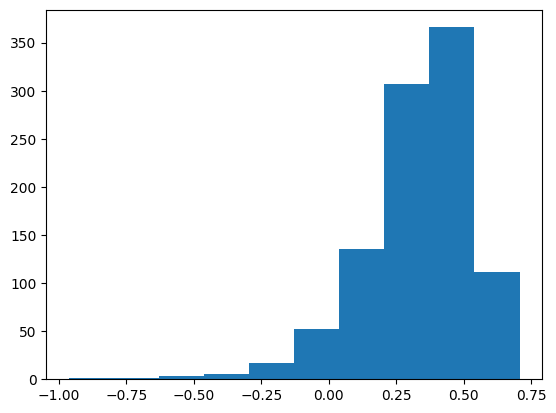

In [253]:
plt.hist(rr["isquare"])